<a href="https://colab.research.google.com/github/yajuna/tmath495Sp24/blob/master/lab1_intro_gradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we introduce the `GradientTape` module from tensorflow by looking at the differential equation

$u_t = u_{xx} + x$

In [4]:
# import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)
import matplotlib
print(matplotlib.__version__)

2.15.0
1.25.2
3.7.1


In [11]:
# 0 < x < 1, 500 points
# 0 < t < 2, 500 points
Nx = 500
Nt = 500
x = np.linspace(0, 1, Nx)
t = np.linspace(0, 2, Nt)

In [15]:
# initial condition
def u0(x):
  return 3 * tf.sin(2 * np.pi * x) + 2 * (1-x)

In [21]:
# boundary conditions
def ul(t):
  return 2 * np.ones(t.size)

def ur(t):
  return t

## This analytical solution is used as a label in training.

In [24]:
# define analytical solution
def utrue(x,t):
  return 3 * tf.sin(2 * np.pi * x) * tf.exp(-4 * np.pi**2 * t) + 2 + (t-2) * x

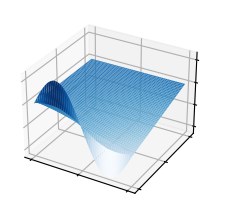

In [27]:
u_analytical = utrue(x,t)

from matplotlib import cm

plt.style.use('_mpl-gallery')


X, T = np.meshgrid(x, t)
R = utrue(X,T)


# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, T, R, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


In [30]:
# Use gradient tape for automatic differentiation
# watch independent variables
with tf.GradientTape(persistent=True) as g:
  t = tf.Variable(t)
  x = tf.Variable(x)
  g.watch(t)
  g.watch(x)
  u_analytical = utrue(x,t) # nn_model(x,t)
  u_t = g.gradient(u_analytical, t)
  u_x = g.gradient(u_analytical, x)
u_xx = g.gradient(u_x, x)

In [31]:
# check the effect of gradientTape, check if u_t - u_xx = x??
def residual(u_t, u_xx, x):
  return u_t - u_xx - x

In [34]:
# test
res = residual(u_t, u_xx, x)
print(np.max(np.abs(res)))

6.453171330633722e-16
